In [1]:
import sns
import tensorflow as tf
import cv2
import numpy as np
import os
import json
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

import tensorflow as tf
from tensorflow import keras
from keras import metrics
tf.get_logger().setLevel('INFO')

2023-10-19 19:35:07.698151: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-19 19:35:08.349752: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Total number of images: 22348


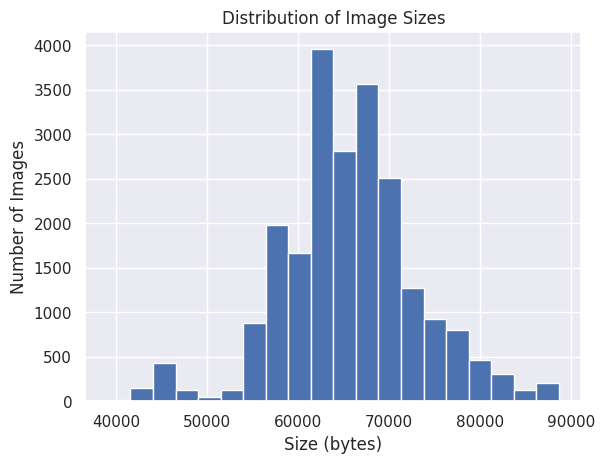

Total number of images: 19445


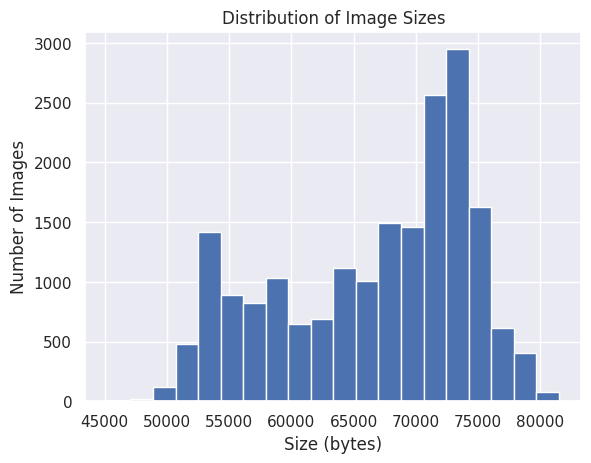

In [2]:
import os
import matplotlib.pyplot as plt

dir_path_drowsy = '/home/mayank/programs/mids/DriverDrowsiness/raw_data/Drowsy'
dir_path_non_drowsy = '/home/mayank/programs/mids/DriverDrowsiness/raw_data/NonDrowsy'


def distribution_image_sizes(directory_path):
    """
    Plots the distribution of image sizes in a directory.
    :param directory_path: path to the directory containing the images
    :return: None
    """
    # get the list of all files in the directory
    files = os.listdir(directory_path)

    # get the list of all image files in the directory
    image_files = [file for file in files if file.endswith('.png')]

    # get the number of images in the directory
    num_images = len(image_files)

    # print the number of images in the directory
    print(f'Total number of images: {num_images}')

    # plot the distribution of image sizes
    sizes = []
    for file in image_files:
        path = os.path.join(directory_path, file)
        size = os.path.getsize(path)
        sizes.append(size)

    plt.hist(sizes, bins=20)
    plt.title('Distribution of Image Sizes')
    plt.xlabel('Size (bytes)')
    plt.ylabel('Number of Images')
    plt.show()
    
    
distribution_image_sizes(dir_path_drowsy)

distribution_image_sizes(dir_path_non_drowsy)

Drowsy Sample Image


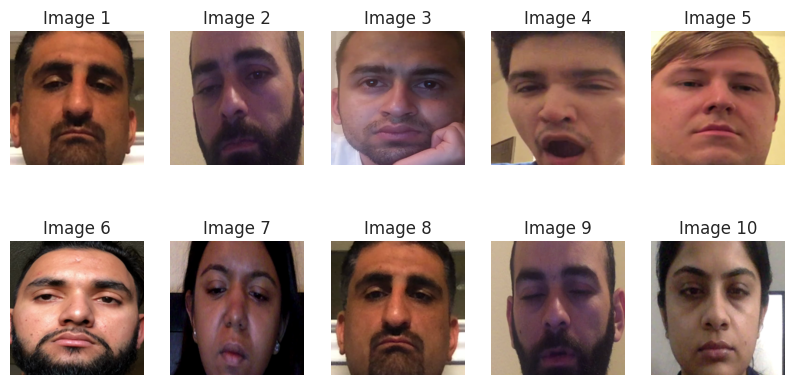

Non Drowsy Sample Image


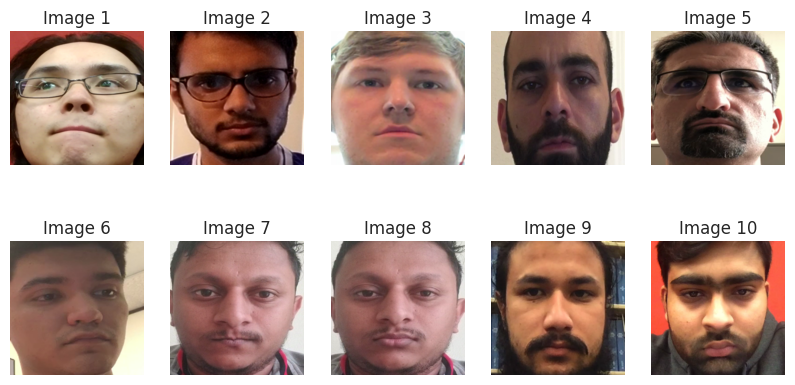

In [3]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_images(dir_path):

    # get the list of all files in the directory
    files = os.listdir(dir_path)
    
    # get the list of all image files in the directory
    image_files = [file for file in files if file.endswith('.png')]
    
    # randomly select 10 images
    selected_images = random.sample(image_files, 10)
    
    # create a 5x2 grid of subplots
    fig, axs = plt.subplots(2, 5, figsize=(10, 5))
    
    # loop through the selected images and plot them in the grid
    for i, image in enumerate(selected_images):
        row = i // 5
        col = i % 5
        
        path = os.path.join(dir_path, image)
        img = mpimg.imread(path)
        axs[row, col].imshow(img)
        axs[row, col].set_title(f'Image {i+1}')
        axs[row, col].axis('off')
        
        #axs[row+2, col].hist(img.ravel(), bins=256, range=(0.0, 1.0))
        #axs[row+2, col].set_title(f'Histogram of Image {i+1}')
        #axs[row+2, col].set_xlim([0.0, 1.0])
    
    plt.show()

print ("Drowsy Sample Image")    
plot_images(dir_path_drowsy)

print ("Non Drowsy Sample Image")
plot_images(dir_path_non_drowsy)


Drowsy Sample Image Min Max and Histogram


,Image Name,Min value,Max value
0,ZC1004.png,0.000000,1.000000
1,P0893.png,0.000000,1.000000
2,L0884.png,0.000000,1.000000
3,O0385.png,0.043137,0.917647
4,A0021.png,0.000000,1.000000
5,X1019.png,0.000000,0.956863
6,M0616.png,0.000000,1.000000
7,E0297.png,0.000000,0.929412
8,W0794.png,0.054902,0.992157
9,Q0066.png,0.023529,1.000000


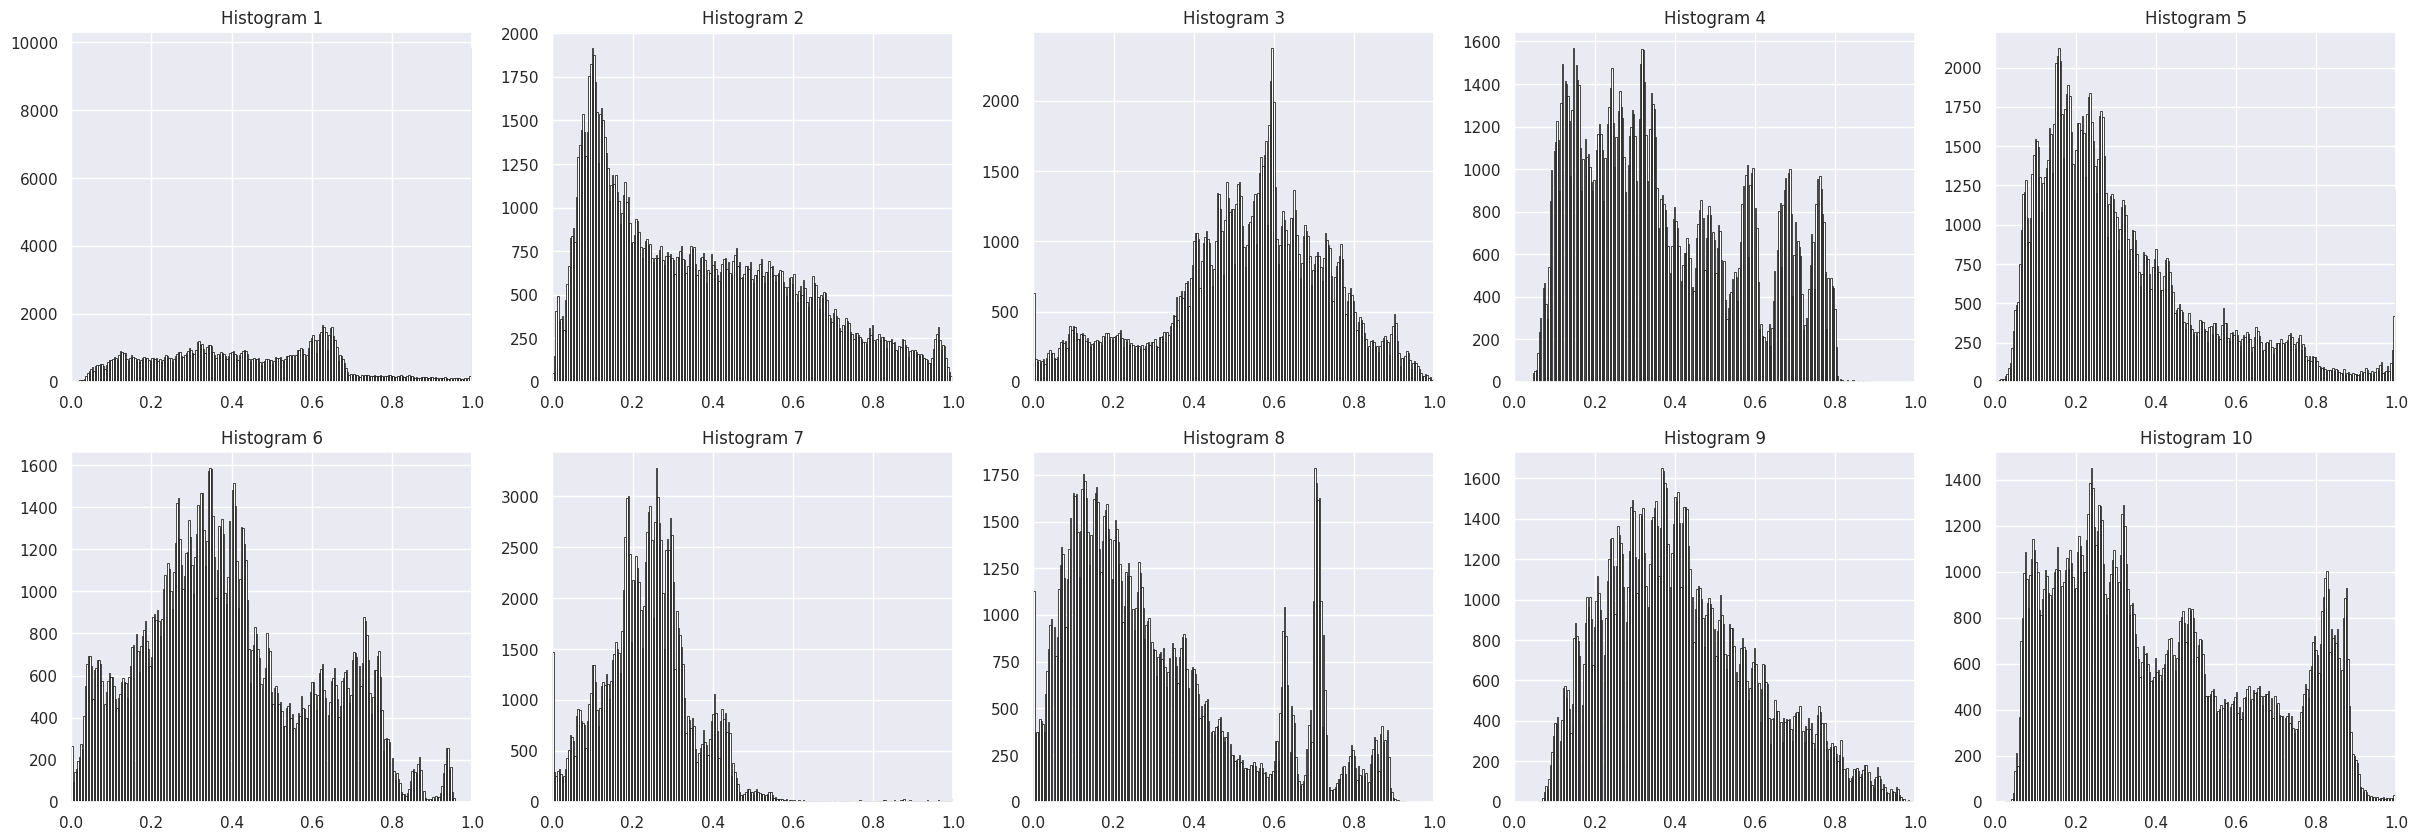

In [4]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from IPython.display import display

def plot_image_histogram(dir_path):
    
        # get the list of all files in the directory
        files = os.listdir(dir_path)
        
        # create an empty dataframe to store the results
        df = pd.DataFrame(columns=['Image Name', 'Min value', 'Max value'])
        
        # get the list of all image files in the directory
        image_files = [file for file in files if file.endswith('.png')]
        
        # randomly select 10 images
        selected_images = random.sample(image_files, 10)
        
        # create a 5x2 grid of subplots
        fig, axs = plt.subplots(2, 5, figsize=(30, 10))
        
        # loop through the selected images and plot them in the grid
        for i, image in enumerate(selected_images):
            row = i // 5
            col = i % 5
            
            path = os.path.join(dir_path, image)
            img = mpimg.imread(path)
            df.loc[i] = [image, np.min(img), np.max(img)]
            
            axs[row, col].hist(img.ravel(), bins=256, color='white', edgecolor='black', linewidth=0.5)
            axs[row, col].set_title(f'Histogram {i+1}')
            axs[row, col].set_xlim([0.0, 1])
            
        display(df)

        plt.show()


print ("Drowsy Sample Image Min Max and Histogram")
plot_image_histogram(dir_path_drowsy)



In [3]:
import os
import shutil

source_directory = '/home/mayank/Downloads/original_dataset/NonDrowsy/'
destination_directory = '/home/mayank/Downloads/original_dataset/train/NonDrowsy/'

# Enumerate the files in the source directory
for filename in os.listdir(source_directory):
    if filename.startswith('A') or filename.startswith('B') or filename.startswith('C') or filename.startswith('D') or filename.startswith('E') or filename.startswith('F') or filename.startswith('G') or filename.startswith('H') or filename.startswith('I') or filename.startswith('J') or filename.startswith('K') or filename.startswith('L') or filename.startswith('M') or filename.startswith('N') or filename.startswith('O') or filename.startswith('P') or filename.startswith('Q') or filename.startswith('R'):
        # Create the destination path
        source_path = os.path.join(source_directory, filename)
        destination_path = os.path.join(destination_directory, filename)
        
        # Move the file to the destination directory
        shutil.move(source_path, destination_path)
